# Attributes of Mobile Apps Selection
Vashti Marin | Data Science Project 1 <br>
This project looks into a dataset of android apps to gain insight into what makes an app successful <br>
DataSet from Kaggle: GooglePlayStoreApps | https://www.kaggle.com/lava18/google-play-store-apps <br>
Submitted to: Shion Guha


In [1]:
#DataSet from Kaggle: GooglePlayStoreApps | https://www.kaggle.com/lava18/google-play-store-apps

from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)
plt.style.use('fivethirtyeight')
import matplotlib.ticker as mticker


In [2]:
#Open up dataset to look at Raw Data 
raw = pd.read_csv('googleplaystore.csv')
raw


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


## Data Prep: 
- Want to know contributions to succession of apps. <br>
- Likely variables to give insight: App, Category, Ratings, Installs, Reviews, Type, Content Rating<br>
**Note**: <br>
  - Category and Genre are very similar so Genre will not be included. <br>
  - Some Reviews are enter as NAN<br>

## Data Cleaning: 
Selecting what's useful to project<br>
- Check if any duplicate entries exist. Remove duplications when necessary.<br>
- Check for null entries<br>
- Check for double entries due to misspelling in Category and Content Rating<br>

In [3]:
unwantedcols= ['Size', 'Price', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
clean1 = raw.drop(unwantedcols, axis = 1)  
clean1.head(10)

,App,Category,Rating,Reviews,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,Everyone
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,"50,000+",Free,Everyone
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,"50,000+",Free,Everyone
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,"1,000,000+",Free,Everyone
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,"1,000,000+",Free,Everyone
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,"10,000+",Free,Everyone


In [4]:
#Note*: Some apps are in more than one Category and is repeated in the Table with their different category.
#Removal of these repeated entries will skew data when based on categories. 

clean1.sort_values("App", inplace = True)
checkdup1 = clean1.duplicated() 
checkdup2 = clean1.duplicated(keep= False)
clean1[checkdup2].head(10)

,App,Category,Rating,Reviews,Installs,Type,Content Rating
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,"500,000+",Free,Everyone 10+
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,"500,000+",Free,Everyone 10+
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,"1,000,000+",Free,Everyone
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,"1,000,000+",Free,Everyone
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,"1,000+",Paid,Everyone
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,"1,000+",Paid,Everyone
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,"100,000+",Free,Everyone
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,"100,000+",Free,Everyone
7035,420 BZ Budeze Delivery,MEDICAL,5.0,2,100+,Free,Mature 17+
2522,420 BZ Budeze Delivery,MEDICAL,5.0,2,100+,Free,Mature 17+


In [5]:
clean2 = clean1.drop_duplicates()
checkval = pd.isna(clean2)
checkval2 = clean2.Category.unique()
checkval3 = clean2.groupby('Category').nunique()
checkval3

,App,Category,Rating,Reviews,Installs,Type,Content Rating
Category,,,,,,,
1.9,1,1,1,1,1,1,0
ART_AND_DESIGN,64,1,14,64,12,2,3
AUTO_AND_VEHICLES,85,1,18,72,15,2,3
BEAUTY,53,1,14,48,12,1,4
BOOKS_AND_REFERENCE,222,1,20,168,17,2,4
BUSINESS,420,1,31,205,18,2,4
COMICS,56,1,19,60,11,1,5
COMMUNICATION,316,1,25,290,19,2,3
DATING,171,1,27,153,15,2,3


In [6]:
checkval4 = clean2.loc[clean2['Category'] == '1.9'] #Locating entry with useless category
checkval4

,App,Category,Rating,Reviews,Installs,Type,Content Rating
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,Free,0,NaN


In [7]:
clean3 = clean2.drop(index = 10472)
checkval5 = clean3.loc[clean3['Category'] == '1.9']
clean3
checkval6 = clean3.groupby('Content Rating').nunique()
checkval6

,App,Category,Rating,Reviews,Installs,Type,Content Rating
Content Rating,,,,,,,
Adults only 18+,3,2,3,3,2,1,1
Everyone,7903,33,39,4655,20,2,1
Everyone 10+,322,23,23,359,19,2,1
Mature 17+,393,26,27,394,18,2,1
Teen,1036,32,26,945,20,2,1
Unrated,2,2,1,2,2,1,1


In [8]:
checkval7 = clean3.loc[clean3['Installs'] == '0']
checkval7

,App,Category,Rating,Reviews,Installs,Type,Content Rating
9148,Command & Conquer: Rivals,FAMILY,NaN,0,0,NaN,Everyone 10+


In [9]:
clean4= clean3.drop(index = 9148)
clean4.iloc[:,4]= clean4.iloc[:,4].str[:-1].str.replace(',','').astype(int)
clean4.iloc[:,3]= clean4.iloc[:,3].astype(int)
clean4['Rate'] = np.where(clean4['Rating'] > 3.5,'high','low')
clean4.head(10)

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Rate
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,500,Free,Everyone,low
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,1000000,Free,Everyone,high
324,- Free Comics - Comic Apps,COMICS,3.5,115,10000,Free,Mature 17+,low
4541,.R,TOOLS,4.5,259,10000,Free,Everyone,high
4636,/u/app,COMMUNICATION,4.7,573,10000,Free,Mature 17+,high
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,100,Free,Everyone,high
10252,1. FC Köln App,SPORTS,4.6,2019,100000,Free,Everyone,high
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,500000,Free,Everyone 10+,high
8483,10 Minutes a Day Times Tables,FAMILY,4.1,681,100000,Free,Everyone,high
7738,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10,100,Paid,Everyone,low


In [10]:
workingtable= clean4.reset_index(drop=True)
workingtable.to_csv('googleplaystorecleaned.csv')
workingtable.head(10)

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Rate
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,500,Free,Everyone,low
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,1000000,Free,Everyone,high
2,- Free Comics - Comic Apps,COMICS,3.5,115,10000,Free,Mature 17+,low
3,.R,TOOLS,4.5,259,10000,Free,Everyone,high
4,/u/app,COMMUNICATION,4.7,573,10000,Free,Mature 17+,high
5,058.ba,NEWS_AND_MAGAZINES,4.4,27,100,Free,Everyone,high
6,1. FC Köln App,SPORTS,4.6,2019,100000,Free,Everyone,high
7,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,500000,Free,Everyone 10+,high
8,10 Minutes a Day Times Tables,FAMILY,4.1,681,100000,Free,Everyone,high
9,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10,100,Paid,Everyone,low


## Visualization of Data
### Things we might want to see:
- What category of apps are installed the most?
- Free vs Paid apps
- Installs based on Content Ratings
- Which apps are more likely to be reviewed? 

In [228]:
#We'll start by displaying the previous category table in a simple bar form
cat_table = workingtable.groupby(['Category']).count()
cat_table

,App,Rating,Reviews,Installs,Type,Content Rating,Rate
Category,,,,,,,
ART_AND_DESIGN,65,62,65,65,65,65,65
AUTO_AND_VEHICLES,85,73,85,85,85,85,85
BEAUTY,53,42,53,53,53,53,53
BOOKS_AND_REFERENCE,230,177,230,230,230,230,230
BUSINESS,427,270,427,427,427,427,427
COMICS,60,58,60,60,60,60,60
COMMUNICATION,366,307,366,366,366,366,366
DATING,196,159,196,196,196,196,196
EDUCATION,130,129,130,130,130,130,130


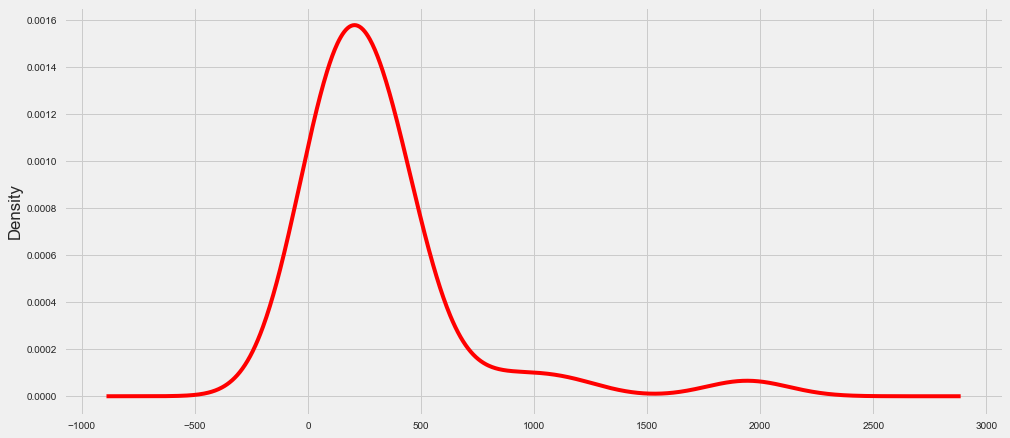

In [229]:
Category_graph = cat_table.plot.kde(y ='App', color = "red", legend = False, figsize = (15,7) )



From this we can immediately tell that there is a significant amount of specific apps in the google store. Next lets look at what those apps are.

Text(0.5,1,'No of Apps by Category')

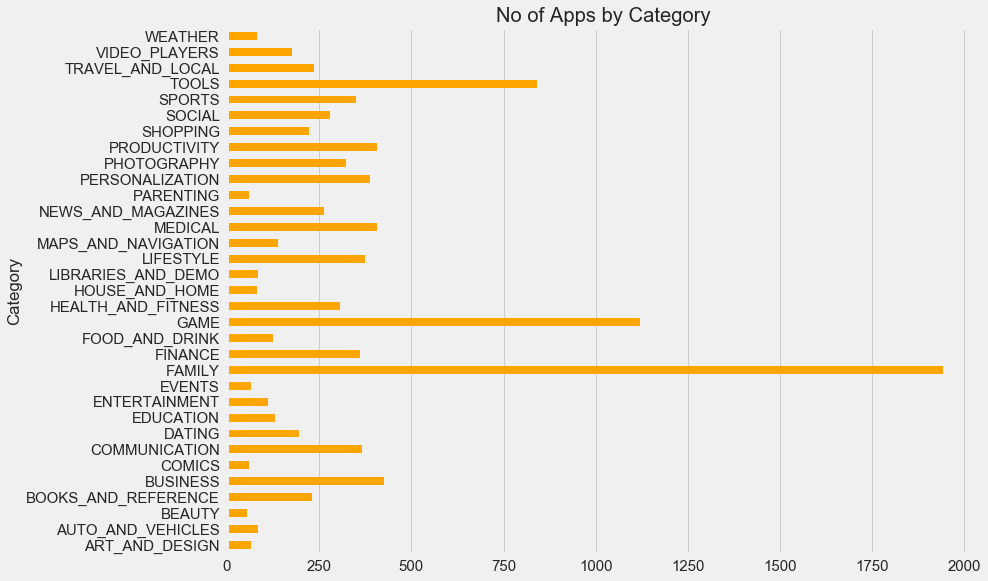

In [230]:
plt.style.use('seaborn-muted')
Category_graph = cat_table.plot(y ='App', color= "orange" ,kind = "barh",legend = False, figsize = (12,9) ).yaxis.grid(False)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title("No of Apps by Category")

,Rating,Reviews,Installs
Content Rating,,,
Adults only 18+,12.9,81348,2000000
Everyone,29654.6,2463126832,100209614961
Everyone 10+,1531.5,589845660,11191271795
Mature 17+,1695.1,151408224,4290696878
Teen,4332.1,999288192,30918280393
Unrated,4.1,1187,50500


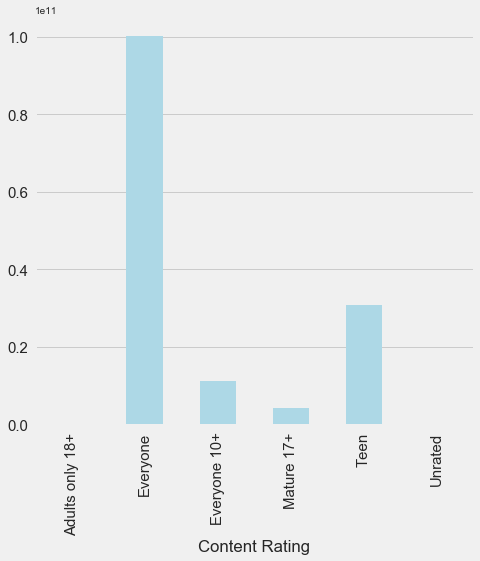

In [172]:
cont = workingtable.groupby(['Content Rating']).sum()

m_graph = cont.plot(y = "Installs", color = "lightblue", kind = "bar",legend = False, figsize = (7,7) ).xaxis.grid(False)
plt.tick_params(axis='both', which='major', labelsize=15)
cont




In [191]:

crate = workingtable.groupby(['Category']).mean().round(2)
crate.sort_values(by=['Rating'])

,Rating,Reviews,Installs
Category,,,
DATING,3.97,28292.84,1053755.65
TOOLS,4.05,324288.41,13589990.40
MAPS_AND_NAVIGATION,4.05,223790.18,5286729.12
VIDEO_PLAYERS,4.06,630743.93,35554301.26
TRAVEL_AND_LOCAL,4.09,234452.15,26843405.68
LIFESTYLE,4.10,34371.51,1433843.27
BUSINESS,4.10,28941.85,2022634.34
FINANCE,4.13,47221.92,2139857.59
NEWS_AND_MAGAZINES,4.13,144870.73,20428855.15


In [198]:
mean = workingtable.groupby(['Content Rating']).mean().round(2)
mean

,Rating,Reviews,Installs
Content Rating,,,
Adults only 18+,4.30,27116.00,666666.67
Everyone,4.18,293929.22,11958187.94
Everyone 10+,4.25,1568738.46,29764020.73
Mature 17+,4.12,338720.86,9598874.45
Teen,4.24,871979.23,26979302.26
Unrated,4.10,593.50,25250.00


,Rating,Reviews,Installs
Type,,,
Free,4.18,437443.69,15282374.45
Paid,4.26,11900.55,90491.35


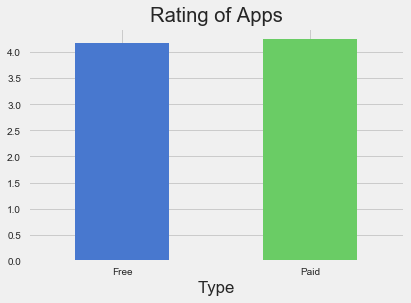

In [225]:
vs=workingtable.groupby(['Type']).mean().round(2)
vs.plot( y = "Rating", kind = "bar", legend = False)
plt.title("Rating of Apps")
plt.tick_params(axis='x', rotation= 0)
vs

,Rating,Reviews,Installs
Rate,,,
high,4.32,524179.70,18223910.45
low,3.00,2163.85,272351.47


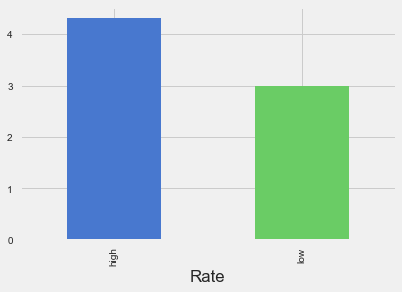

In [211]:
vs2=workingtable.groupby(['Rate']).mean().round(2)
vs2.plot( y = "Rating", kind = "bar" , legend = False)
vs2

Text(0.5,1,'Average Installs')

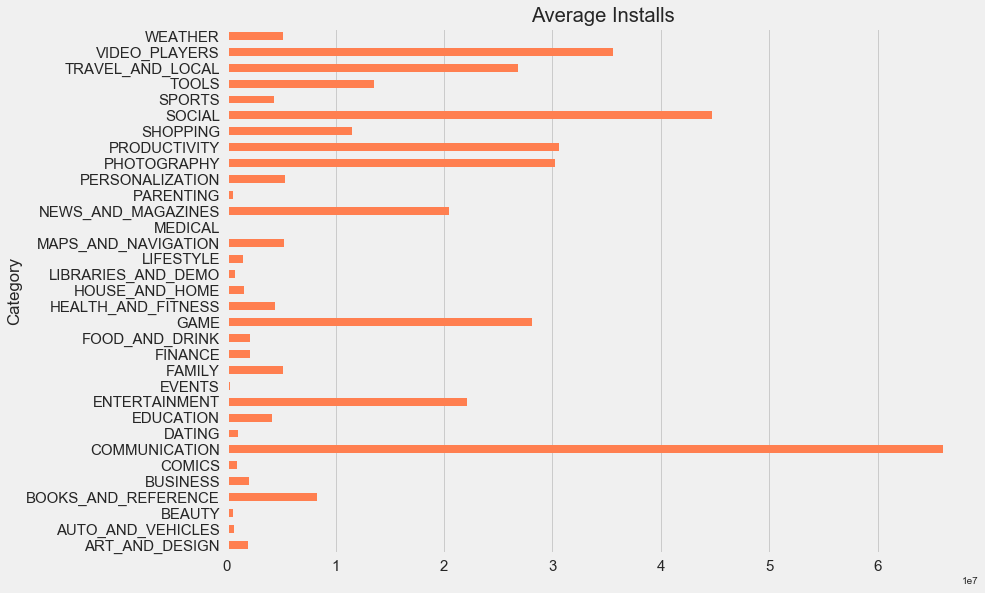

In [216]:
vs3= workingtable.groupby(['Category']).mean().round(2)
vs3.plot(y ='Installs', color= "coral" ,kind = "barh",legend = False, figsize = (12,9) ).yaxis.grid(False)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title("Average Installs")

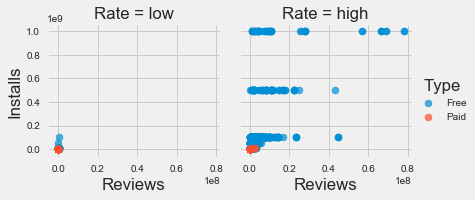

In [41]:
g = sns.FacetGrid(workingtable, col="Rate", hue="Type")
g.map(plt.scatter, "Reviews", "Installs", alpha = .7)
g.add_legend();

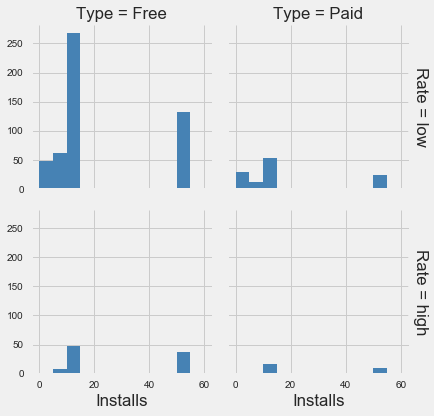

In [17]:
g = sns.FacetGrid(workingtable, row="Rate", col="Type", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "Installs", color="steelblue", bins=bins)